                                Домашняя работа 
                                                                                      Гарик Варданян, Группа БЭК151:

In [3]:
import numpy as np
%pylab inline
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

moviestat = pd.read_csv('/Users/garik/Desktop/movie_metadata.csv')

Populating the interactive namespace from numpy and matplotlib


In [4]:
moviestat_3 = moviestat[(moviestat.imdb_score > 7) & (moviestat.title_year > 1980)]
moviestat_2 = moviestat[(moviestat.imdb_score > 7) & (moviestat.title_year > 1999) &(moviestat.title_year<=2016)]
moviestat_4 = moviestat[(moviestat.actor_1_name == "Christian Bale") | (moviestat.actor_1_name == "Leonardo DiCaprio")]
moviestat_5 = moviestat[(moviestat.country == "India")]
moviestat_6 = moviestat[(moviestat.director_name == 'Christopher Nolan') | (moviestat.director_name == 'James Cameron') ]
moviestat_7 = moviestat[(moviestat.genres == 'Action') | (moviestat.genres == 'Comedy')| (moviestat.genres == 'Drama') ]

Мы будем рассматривать все фильмы которые есть в IMDB, у которых рейтинг выше 7. Будем считать, что, чем выше рейтинг, тем лучше фильм(конечно это не всегда так).

График показывает связь между годом выпуска фильма и его рейтингом. 

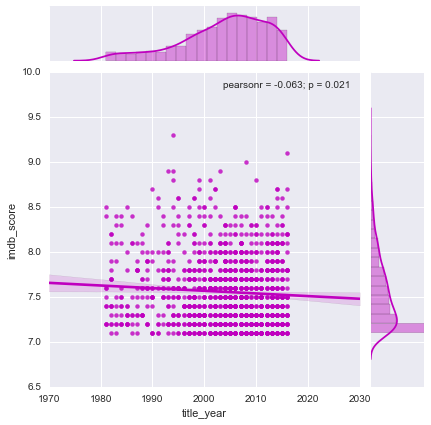

In [6]:
sns.jointplot(data=moviestat_3, x='title_year', y='imdb_score',color = 'm',kind = 'reg')

График показывает связь между годом выпуска, количеством лайков фильма в Фейсбуке и рейтингом IMDB. 

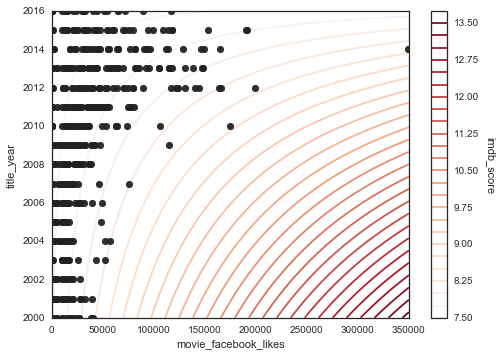

In [7]:
sns.set(style="white")
sns.interactplot( x1='movie_facebook_likes',x2 = 'title_year', y='imdb_score', data=moviestat_2,color = 'm')

График показывает распределение рейтинга всех фильмов которые есть на IMDB. Медианой и модой является точка 6.44(её находим с помощью функции describe).

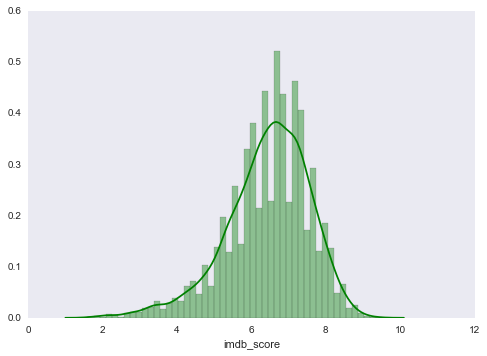

In [6]:
sns.set(style='dark')
sns.distplot(moviestat.imdb_score,color = 'g')

График ниже сравнивает моих любимых актеров, в нем учитывается рейтинг всех фильмов, в которых они сыграли главную роль, и как мы видим, парень с Титаника побеждает Бэтмена!!!

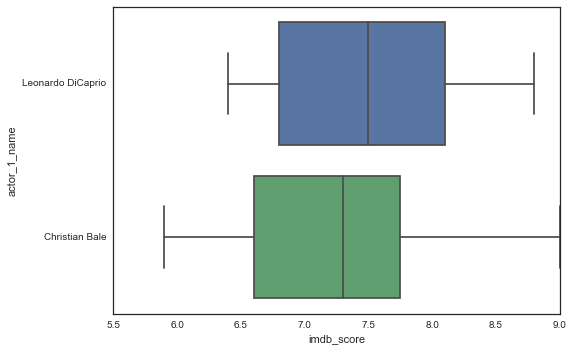

In [9]:
sns.boxplot(moviestat_4.actor_1_name,moviestat_4.imdb_score,vert = False) 

График ниже показывает вероянтость того, что фильм будет длится меньше чем какое то количество минут.Опять же с помощью функции describe и графика мы знаем,что фильмы в среднем длятся 107 минут. Болливуд в недоумении!!! 

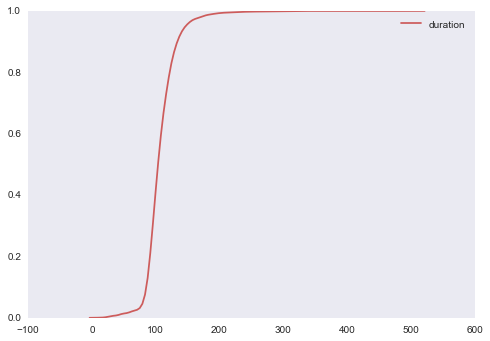

In [19]:
sns.kdeplot(moviestat.duration.dropna(),cumulative = True,color = sns.desaturate('indianred',1))

Чтобы не обидеть никого, давайте посмотрим сколько в среднем длятся фильмы в Индии. Из графика видно, что они длятся в среднем всего 150 минут, хотя конечно есть фильмы, на просмотр которых вы потратие больше 3 часов!!!

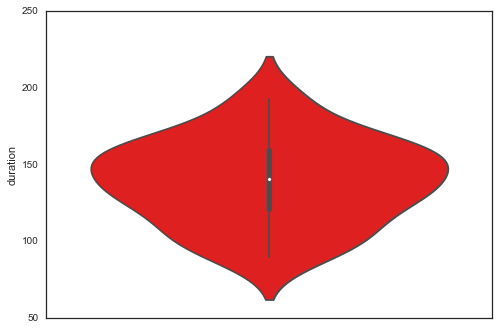

In [11]:
sns.violinplot(moviestat_5.dropna(),moviestat_5.duration,color = 'r')

Тепловая карта ниже показывает связь между возрастными ограничениями и рейтингом IMDB. На 5 строчке находится рейтинг R, а на 4 PG-13. Как мы видим, фильмы у которых высокий рейтинг, в основном имеют рейтинг R (17+).

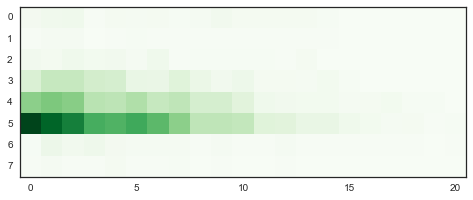

In [12]:
plt.imshow(pd.crosstab(moviestat_3.content_rating, moviestat_3.imdb_score),cmap ="Greens" ,interpolation = 'none')

А следующий график еще раз доказывает, что Кристофер Нолан (который снял шедевры про Бэтмена) является лучшим режиссером в мире. График показывает, что в среднем(да и не только) у Нолана рейтинг фильмов выше, чем у Кэмерона(режиссер Аватара).

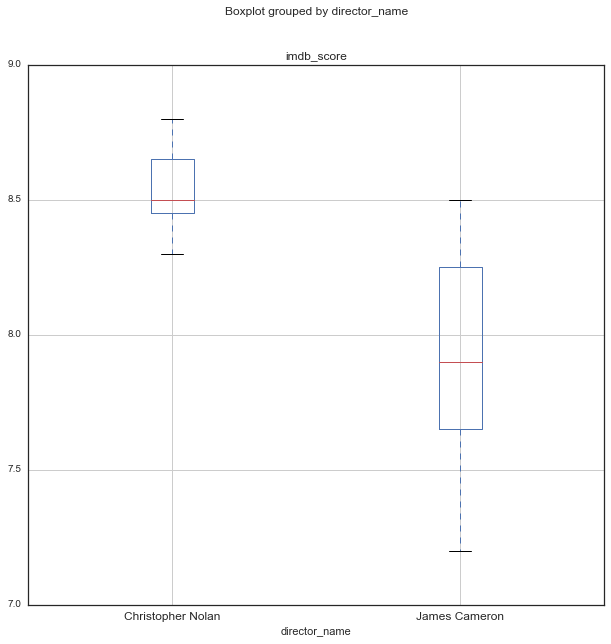

In [13]:
moviestat_6.boxplot(column='imdb_score',  by='director_name', figsize=(10,10))
plt.show()

Следующий график показывает связь между жанром и рейтингом фильма. Как ни странно, у мелодрам рейтинг в основном выше, чем у комедий и триллеров.

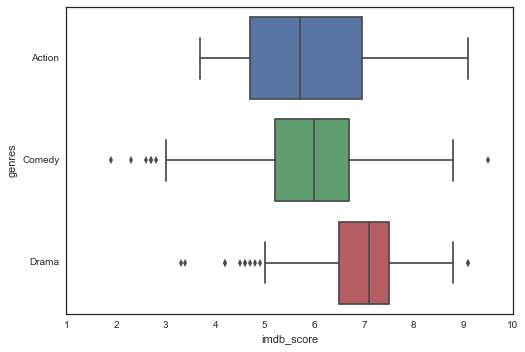

In [14]:
sns.boxplot(moviestat_7.genres,moviestat_7.imdb_score,vert = False)

Так как воображения и сил не осталось, то следующий график является миксом 25 разных графиков. Осями являются рейтинг IMDB, бюджет фильма, выручка, год в котором фильм вышел, и его длительность.

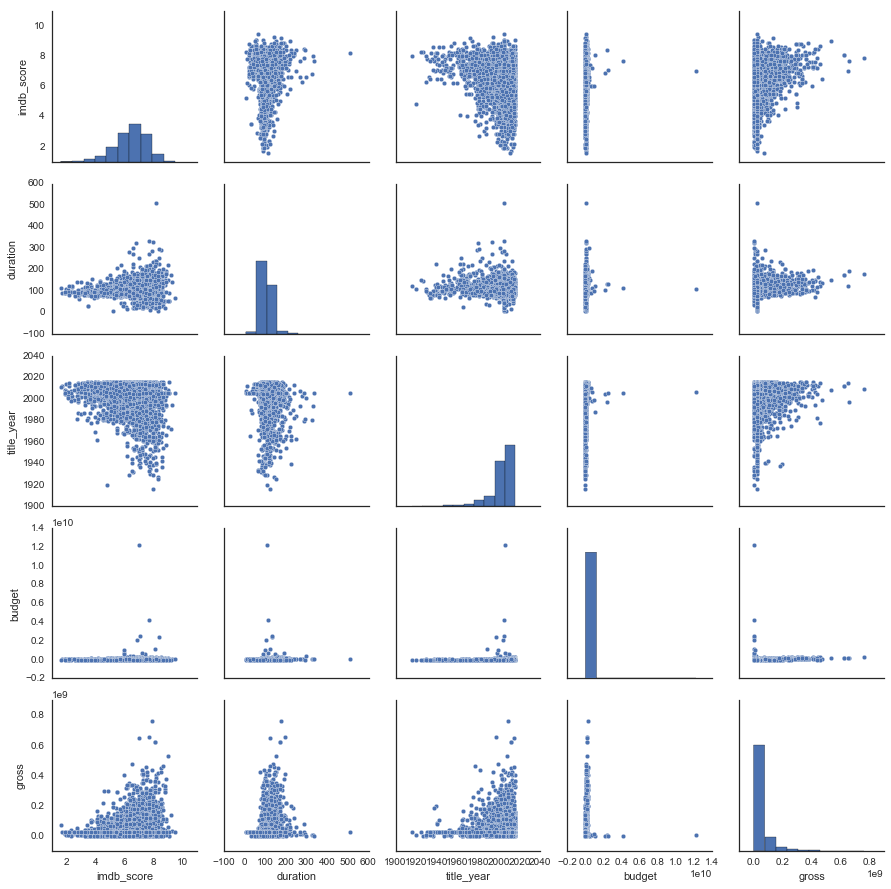

In [15]:
moviestat['duration'].fillna(moviestat['duration'].median(), inplace=True)
moviestat['imdb_score'].fillna(moviestat['imdb_score'].median(), inplace=True)
moviestat['budget'].fillna(moviestat['budget'].median(), inplace=True)
moviestat['title_year'].fillna(moviestat['title_year'].median(), inplace=True)
moviestat['gross'].fillna(moviestat['gross'].median(), inplace=True)
sns.pairplot(moviestat[['imdb_score', 'duration', 'title_year', 'budget', 'gross']]);

